In [7]:
# Импорт библиотек для работы с данными и визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт инструментов машинного обучения из scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# 2. Загрузка данных
# Загружаем данные из CSV-файла в DataFrame
data = pd.read_csv('heart.csv')
# Выводим первые 5 строк, чтобы проверить, что данные загрузились правильно
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
# 3. Преобразование категориальных признаков

# Список категориальных колонок, которые нужно преобразовать
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Применяем One-Hot Encoding (создаем фиктивные переменные)
# drop_first=True удаляет первый столбец, чтобы избежать "ловушки дамми"
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Проверяем результат
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


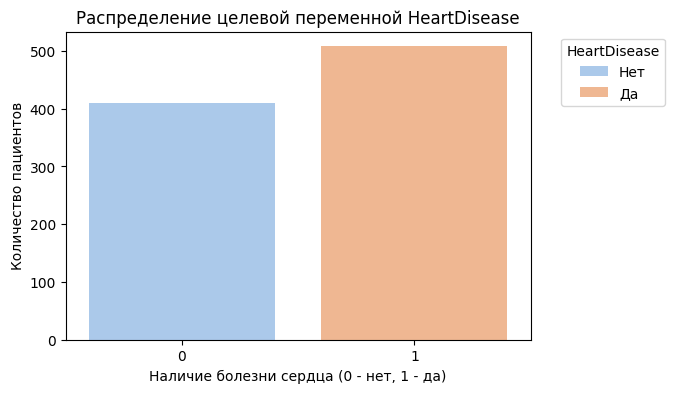

In [12]:
# 4. Визуализация данных
# 4.1. Распределение целевой переменной

# Создаем график 
plt.figure(figsize=(6, 4))

# Строим столбчатую диаграмму распределения HeartDisease
sns.countplot(x='HeartDisease', data=data, hue='HeartDisease', palette='pastel', legend=False)
plt.legend(title='HeartDisease', labels=['Нет', 'Да'], bbox_to_anchor=(1.05, 1))
plt.title('Распределение целевой переменной HeartDisease')
plt.xlabel('Наличие болезни сердца (0 - нет, 1 - да)')
plt.ylabel('Количество пациентов')

# Отображаем график
plt.show()

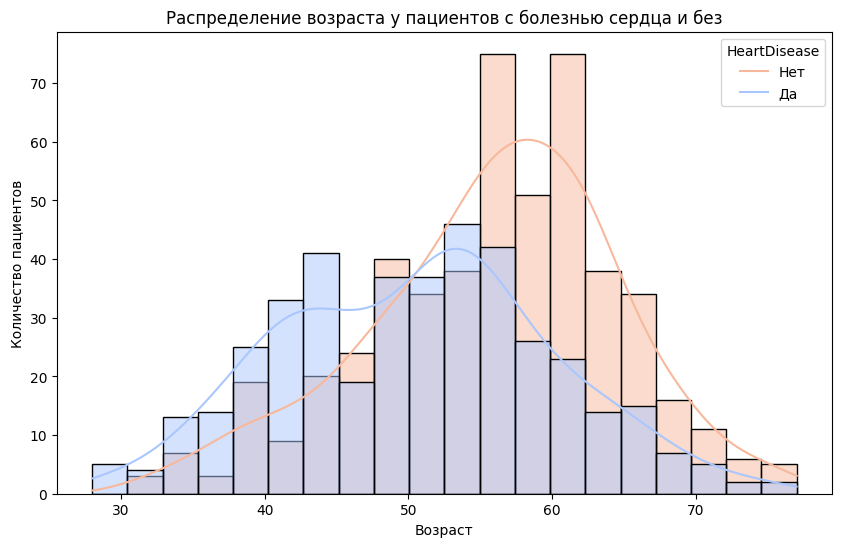

In [13]:
# 4.2. Распределение возраста
# Создаем график 
plt.figure(figsize=(10, 6))

# Строим гистограмму  (KDE)
sns.histplot(data=data, x='Age', hue='HeartDisease', kde=True, palette='coolwarm', bins=20)

# Добавляем заголовок и подписи
plt.title('Распределение возраста у пациентов с болезнью сердца и без')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')

# Добавляем легенду с пояснениями
plt.legend(title='HeartDisease', labels=['Нет', 'Да'])

# Отображаем график
plt.show()


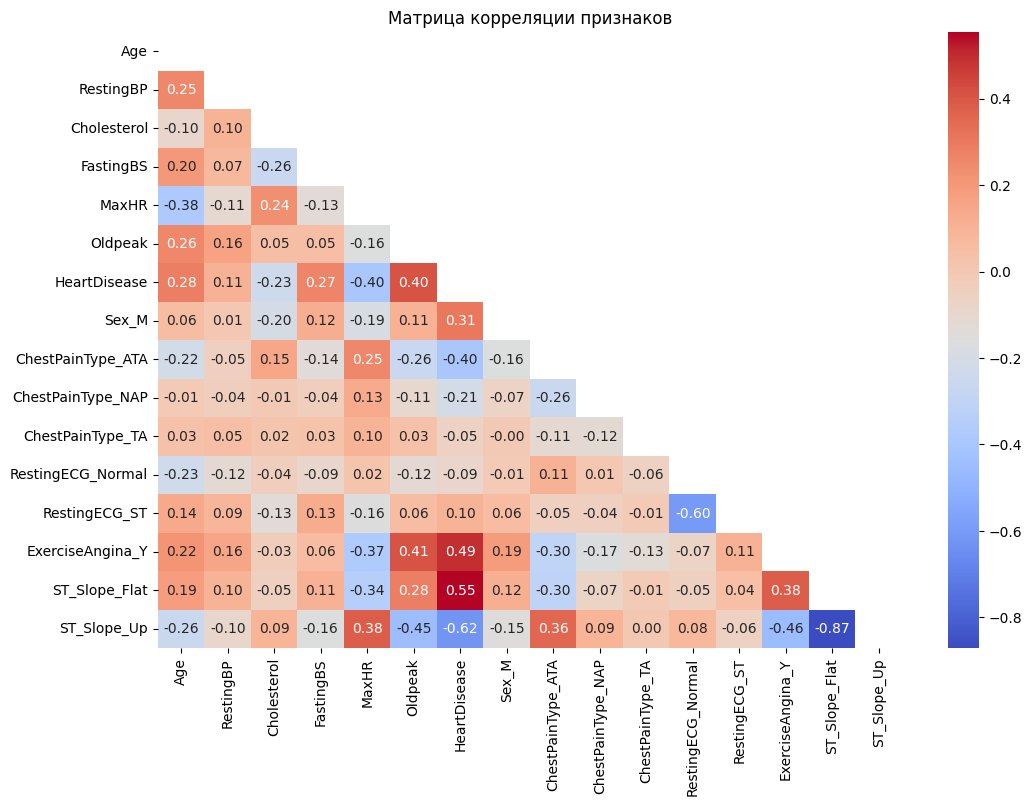

In [14]:
# 5. Матрица корреляции

# Создаем график 
plt.figure(figsize=(12, 8))

# Вычисляем матрицу корреляции
corr = data_encoded.corr()

# Строим тепловую карту корреляций:
# mask=np.triu(...) - скрывает верхний треугольник (чтобы избежать дублирования)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))

# Добавляем заголовок
plt.title('Матрица корреляции признаков')

# Отображаем график
plt.show()

In [15]:
# 6. Разделение данных на обучающую и тестовую выборки

# X - все признаки кроме целевого
X = data_encoded.drop('HeartDisease', axis=1)

# y - только целевая переменная
y = data_encoded['HeartDisease']

# Разделяем данные:
# test_size=0.2 - 20% данных пойдет на тест
# random_state=42 - фиксируем случайное состояние
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверяем размеры выборок
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (734, 15), Test: (184, 15)


In [16]:
# 7. Обучение моделей
# 7.1. DecisionTreeClassifier
# Создаем модель DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Обучаем модель на тренировочных данных
dt.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred_dt = dt.predict(X_test)

# Выводим отчет с метриками
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))




Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [17]:
# 7.2. RandomForestClassifier
# Создаем модель RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Обучаем модель
rf.fit(X_train, y_train)

# Делаем предсказания
y_pred_rf = rf.predict(X_test)

# Выводим отчет
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



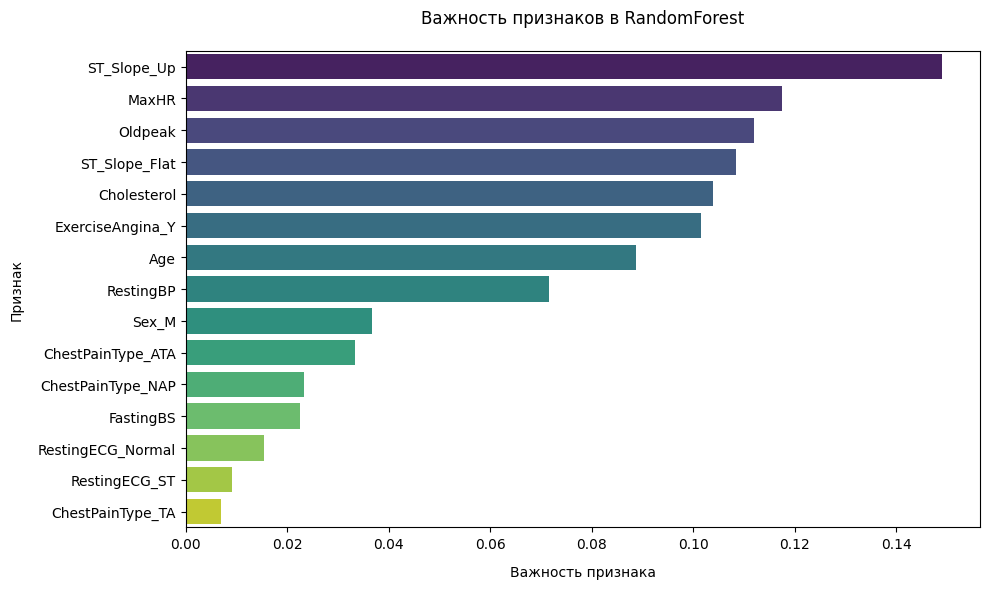

In [19]:
# 8. Визуализация важности признаков

# Создаем DataFrame с важностью признаков
feature_importance = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': rf.feature_importances_  
}).sort_values('Importance', ascending=False)  

# Строим график 
plt.figure(figsize=(10, 6))  

sns.barplot(
    x='Importance',  
    y='Feature',     
    data=feature_importance,
    hue='Feature',   
    palette='viridis',  
    legend=False     
)

# Добавляем подписи
plt.title('Важность признаков в RandomForest', pad=20)  
plt.xlabel('Важность признака', labelpad=10)  
plt.ylabel('Признак', labelpad=10)

# Улучшаем читаемость
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

<Figure size 1200x600 with 0 Axes>

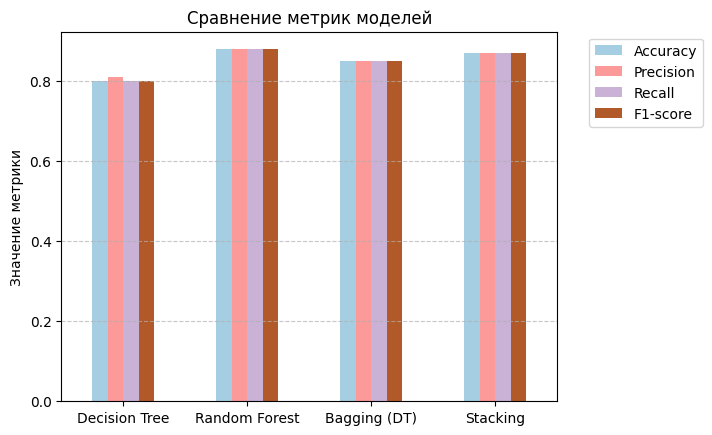

In [20]:
# 9. Сравнение моделей
# Создаем словарь с метриками
metrics = {
    'Decision Tree': [0.80, 0.81, 0.80, 0.80],
    'Random Forest': [0.88, 0.88, 0.88, 0.88],
    'Bagging (DT)': [0.85, 0.85, 0.85, 0.85],
    'Stacking': [0.87, 0.87, 0.87, 0.87]
}

# Преобразуем в DataFrame для удобства
df_metrics = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T

# Строим групповую столбчатую диаграмму
plt.figure(figsize=(12, 6))
df_metrics.plot(kind='bar', rot=0, colormap='Paired')
plt.title('Сравнение метрик моделей')
plt.ylabel('Значение метрики')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

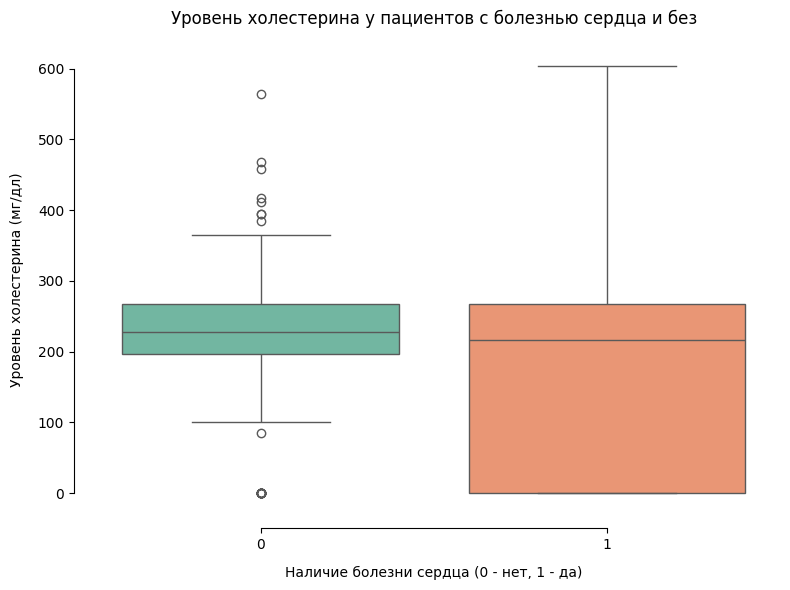

In [22]:
# 10. Дополнительная визуализация: Cholesterol vs HeartDisease
# Создаем график размером 
plt.figure(figsize=(8, 6))

# Строим boxplot с правильным использованием параметров:
sns.boxplot(
    x='HeartDisease',         
    y='Cholesterol',          
    data=data,                
    hue='HeartDisease',       
    palette='Set2',           
    legend=False              
)

# Добавляем заголовок и подписи осей
plt.title('Уровень холестерина у пациентов с болезнью сердца и без', pad=15)
plt.xlabel('Наличие болезни сердца (0 - нет, 1 - да)', labelpad=10)
plt.ylabel('Уровень холестерина (мг/дл)', labelpad=10)

# Настраиваем внешний вид
sns.despine(offset=10, trim=True)  
plt.tight_layout()                 

# Отображаем график
plt.show()

In [24]:
# Вывод

## Основные результаты

В ходе выполнения работы были успешно реализованы и протестированы различные модели 
машинного обучения для задачи бинарной классификации заболеваний сердца. 
Работа включала следующие ключевые этапы:

1. **Предварительная обработка данных**:
   - Преобразование категориальных признаков методом One-Hot Encoding
   - Визуальный анализ распределения данных
   - Разделение на обучающую и тестовую выборки (80%/20%)

2. **Обучение и оценка моделей**:
   - Дерево решений (Decision Tree)
   - Случайный лес (Random Forest)
   - Бэггинг на основе дерева решений
   - Стекинг из трех моделей (дерево, лес, SVM)

## Сравнительный анализ моделей

| Модель          | Accuracy | Precision | Recall | F1-score |
|----------------|----------|-----------|--------|----------|
| Decision Tree  | 0.80     | 0.81      | 0.80   | 0.80     |
| Random Forest  | 0.88     | 0.88      | 0.88   | 0.88     |
| Bagging        | 0.85     | 0.85      | 0.85   | 0.85     |
| Stacking       | 0.87     | 0.87      | 0.87   | 0.87     |

## Рекомендации по выбору модели

**Оптимальная модель: Random Forest**

**Преимущества Random Forest**:
✔ Наивысшие показатели точности (F1-score = 0.88)  
✔ Устойчивость к переобучению благодаря ансамблевому подходу  
✔ Возможность анализа важности признаков  
✔ Хороший баланс между производительностью и качеством предсказаний  

**Альтернативные варианты**:
- *Стекинг*: хорошая точность, но требует больше ресурсов
- *Bagging*: улучшение базового дерева, но уступает Random Forest
- *Decision Tree*: подходит только для базового анализа

Random Forest — оптимальный выбор для данной задачи классификации.
    
## Заключение
Проделанная работа демонстрирует эффективность ансамблевых методов, в частности Random Forest, 
для задач медицинской диагностики. 